In [1]:
import sys, os
import scDART
import pandas as pd
import numpy as np

In [2]:
sc = scDART.scDART(n_epochs=100)

In [3]:
p = "./data/Endo/"
dataset = (p + "counts_rna.csv", p + "anno_rna.txt", None, p + "counts_atac.csv", p + "anno_atac.txt", None, p+"region2gene.csv")

In [4]:
rna_count = pd.read_csv(dataset[0], index_col=0).values
rna_anno = []
with open(dataset[1], "r") as fp:
    for i in fp:
        rna_anno.append(i.strip("\n"))
rna_anno = np.array(rna_anno)

In [5]:
atac_count = pd.read_csv(dataset[3], index_col=0).values
atac_count = np.where(atac_count < 1, 0, 1)
atac_anno = []
with open(dataset[4], "r") as fp:
    for i in fp:
        atac_anno.append(i.strip("\n"))
atac_anno = np.array(atac_anno)

In [6]:
reg = pd.read_csv(dataset[-1], index_col=0, header=0).values

In [7]:
print(rna_count.shape, rna_anno.shape)
print(atac_count.shape, atac_anno.shape)
print(reg.shape)

(1628, 497) (1628,)
(1186, 11487) (1186,)
(11487, 497)


In [16]:
# sc.fit_transform(rna_count = rna_count, atac_count = atac_count, reg = reg)

Loaded dataset
Device:  cuda
Number of anchor cells not specified, using exact mode for distance calculation instead.
Diffusion distance calculated, time used (sec): 10.710607051849365
Diffusion distance calculated, time used (sec): 6.714842081069946
Model: {'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum

(array([[-0.20753667, -0.27322543, -0.05810302, ..., -0.22019805,
         -0.53900355, -0.1895007 ],
        [-0.17172405, -0.09075631, -0.10239848, ..., -0.16046739,
         -0.37694746, -0.36710176],
        [-0.31551674, -0.3910929 , -0.19375111, ..., -0.18530309,
         -0.19757321, -0.25236636],
        ...,
        [ 1.7908063 , -1.9427748 , -1.4388907 , ..., -3.6893957 ,
          1.2410518 , -0.33499274],
        [ 1.7603261 , -1.6352668 , -1.4822379 , ..., -3.618775  ,
          1.348376  , -0.38909146],
        [ 2.0036938 , -1.8524281 , -1.653691  , ..., -3.207859  ,
          1.0857148 , -0.29336452]], dtype=float32),
 array([[-0.5523704 , -0.07011643, -0.14524767, ..., -0.40606743,
         -0.58531684, -0.36437708],
        [-0.28721356, -0.20151018, -0.26352626, ..., -0.22214825,
         -0.3557881 , -0.41720825],
        [-0.13924642, -0.1410481 ,  0.00983247, ..., -0.23056966,
         -0.43593788, -0.09644854],
        ...,
        [ 1.5944546 , -2.0172431 , -1.7

In [20]:
# sc.fit(rna_count = rna_count, atac_count = atac_count, reg = reg)

Loaded Dataset
Device:  cuda
Number of anchor cells not specified, using exact mode for distance calculation instead.
Diffusion distance calculated, time used (sec): 11.055421352386475
Diffusion distance calculated, time used (sec): 7.106246709823608
Model: {'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum

In [26]:
# sc.save_model("endo_test.pt")

Model saved


In [8]:
sc.load_model("endo_test.pt")

{'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
  )
), 'encoder': Encoder(
  (fc): FC(
    (fc_layers): Sequential(
      (Layer 0): Sequential(
        (linear): Linear(in_features=497, ou

In [9]:
sc.transform(rna_count = rna_count, atac_count = atac_count)

Transform finished


(array([[-0.23673731,  0.36143008, -0.5213224 , ...,  0.16554376,
         -0.15767252, -0.06174954],
        [-0.33741146,  0.4130253 , -0.3495671 , ..., -0.15678476,
          0.07954165, -0.01577616],
        [-0.21761674,  0.5355949 , -0.5344181 , ...,  0.15952742,
         -0.13291964, -0.18014926],
        ...,
        [ 2.3491242 , -2.0714414 , -1.8972538 , ..., -0.4129218 ,
         -0.88609564,  0.19767943],
        [ 2.2266364 , -1.9856939 , -1.6821655 , ..., -0.49413538,
         -0.71064293,  0.08003188],
        [ 2.2947814 , -1.969085  , -1.8491647 , ..., -0.43988144,
         -0.52559924, -0.0440606 ]], dtype=float32),
 array([[-0.24161032,  0.30671495, -0.32627487, ..., -0.11103357,
          0.03871385, -0.18883075],
        [-0.29065168,  0.38598046, -0.33010894, ...,  0.23974946,
          0.01750237, -0.0779656 ],
        [-0.18379302,  0.4813457 , -0.29437605, ..., -0.01830268,
          0.17656896, -0.03800547],
        ...,
        [ 2.415344  , -2.1160965 , -1.8

test_endo_embedding.pdf


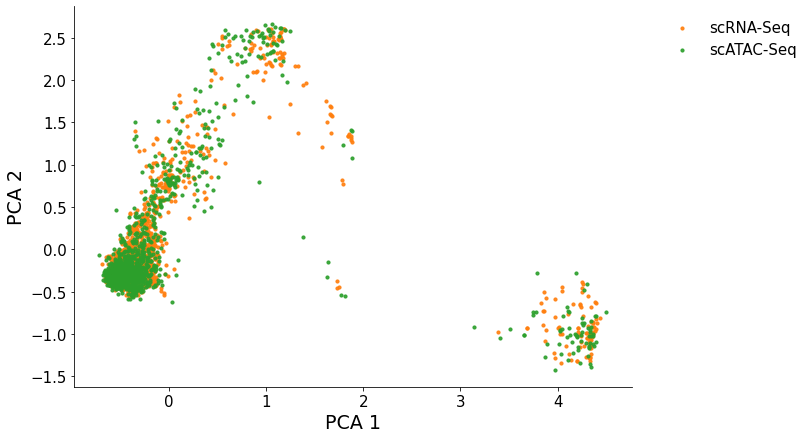

In [10]:
sc.visualize(mode = "embedding", save_path = "test_endo_embedding.pdf")

running Leiden clustering
finished
test_endo_backbone.pdf


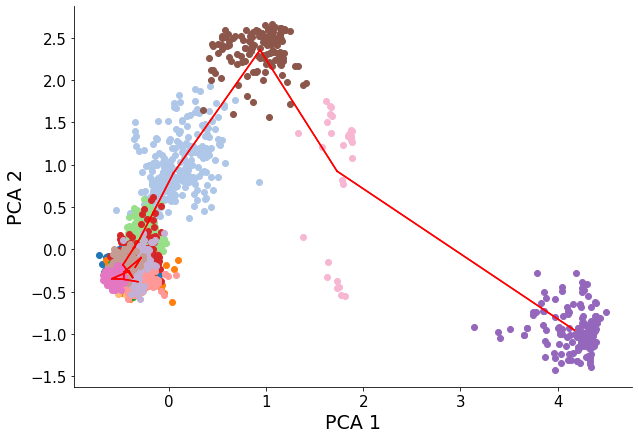

In [11]:
sc.visualize(mode ="backbone", save_path = "test_endo_backbone.pdf")

running Leiden clustering
finished
test_endo_pseudotime.pdf


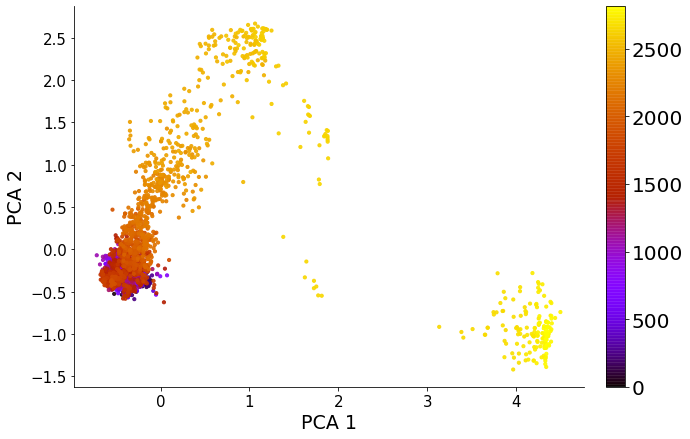

In [12]:
sc.visualize(mode = "pseudotime", save_path = "test_endo_pseudotime.pdf")